In [16]:
import yfinance as yf
import numpy as np
import datetime as dt

def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns * weights) * Time
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(Time)
    return returns, std

stockList = ['INFY', 'RELIANCE', 'TCS', 'HCLTECH']
stocks = [stock + '.NS' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanreturns, covmatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)


[*********************100%***********************]  4 of 4 completed


C:\Users\Puneeth G B\anaconda3\lib\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Puneeth G B\anaconda3\lib\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Puneeth G B\anaconda3\lib\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
C:\Users\Puneeth G B\anaconda3\lib\site-packages\yfinance\utils.py:689: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed i

In [17]:
print(weights)

[0.16572315 0.35210456 0.01631561 0.46585668]


In [18]:
mc_sims = 100
t=100

In [25]:
meanmatrix = np.full(shape=(t,len(weights)),fill_value=meanreturns)
meanmatrix =meanmatrix.T
portforlio_sims = np.full(shape=(t,len(weights)),fill_value=0.0)
initialportfolio = 10000
portfolio_sims = np.full(shape=(t, mc_sims), fill_value=0.0)
for m in range(0,mc_sims):
    z = np.random.normal(size=(t,len(weights)))
    l = np.linalg.cholesky(covmatrix)
    dailyreturns = meanmatrix + np.inner(l,z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights,dailyreturns.T)+1)*initialportfolio

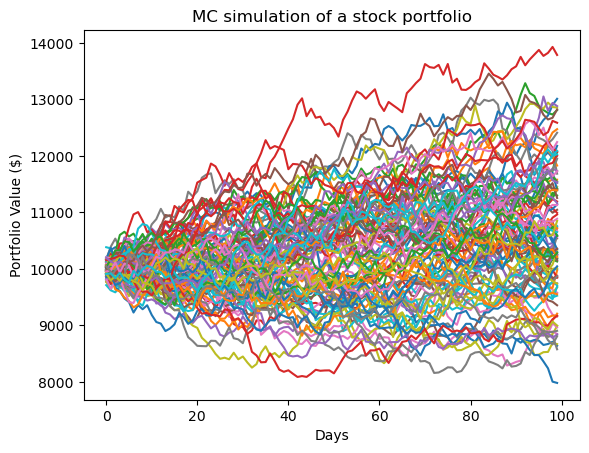

In [26]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()